In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'events.csv')

In [2]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [5]:
df.shape

(885129, 9)

In [4]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [50]:
df = df.sort_values('event_time')

In [79]:
mau = df.groupby(df['event_time'].dt.strftime('%m-%y')).agg({'user_id':'nunique'}).reset_index()

In [80]:
cart_count_users = df[df['event_type']=='cart'].groupby(df['event_time'].dt.strftime('%m-%y')).agg({'user_id':'nunique'}) \
    .reset_index().rename({'user_id':'cart_amount'},axis=1)

In [81]:
cart_count_users

,event_time,cart_amount
0,01-21,8517
1,02-21,7726
2,09-20,1054
3,10-20,6424
4,11-20,7434
5,12-20,6650


In [82]:
purchase_count_users = df[df['event_type']=='purchase'].groupby(df['event_time'].dt.strftime('%m-%y')).agg({'user_id':'nunique'}) \
    .reset_index().rename({'user_id':'purchase_amount'},axis=1)

In [83]:
prep = pd.merge(mau,cart_count_users,how='inner',on='event_time')

In [84]:
cr = pd.merge(prep,purchase_count_users,how='inner',on='event_time')

In [86]:
cr['cart_per'] = round(cr['cart_amount']/cr['user_id']*100,2)
cr['purchase_per'] = round(cr['purchase_amount']/cr['user_id']*100,2)

In [94]:
cr['month'] = cr['event_time'].apply(lambda x:int(x[:2]))
cr['year'] = cr['event_time'].apply(lambda x:int(x[3:]))
cr = cr.sort_values(by=['year','month'])

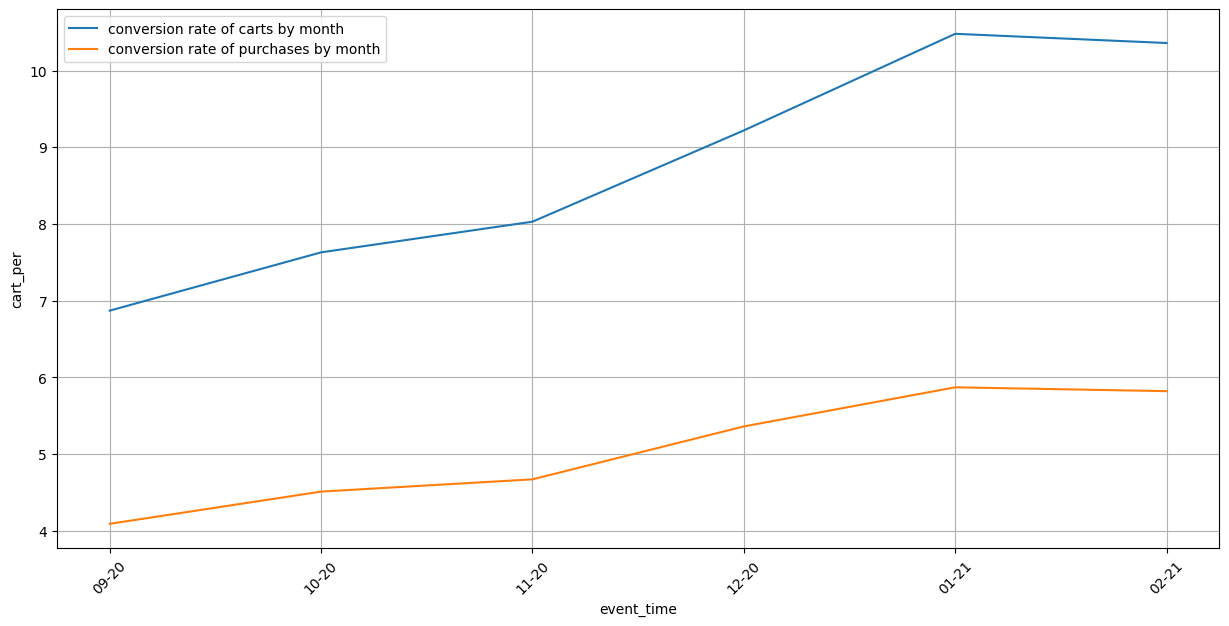

In [109]:
plt.figure(figsize=(15,7))
sns.lineplot(data=cr,x='event_time',y='cart_per',label='conversion rate of carts by month')
sns.lineplot(data=cr,x='event_time',y='purchase_per',label='conversion rate of purchases by month')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [149]:
wau = df.groupby(df['event_time'].dt.strftime('%U-%m-%y')).agg({'user_id':'nunique'}).reset_index()

In [154]:
wau['week'] = wau['event_time'].apply(lambda x:int(x[:2]))

In [158]:
wau['month'] = wau['event_time'].apply(lambda x:int(x[3:5]))

In [160]:
wau['year'] = wau['event_time'].apply(lambda x:int(x[6:]))

In [161]:
wau

,event_time,user_id,week,month,year
0,00-01-21,3884,0,1,21
1,01-01-21,18234,1,1,21
2,02-01-21,20502,2,1,21
3,03-01-21,20249,3,1,21
4,04-01-21,19563,4,1,21
5,05-01-21,2883,5,1,21
6,05-02-21,18249,5,2,21
7,06-02-21,19876,6,2,21
8,07-02-21,18971,7,2,21
9,08-02-21,17955,8,2,21


In [162]:
wau = wau.sort_values(by=['year','month','week'])

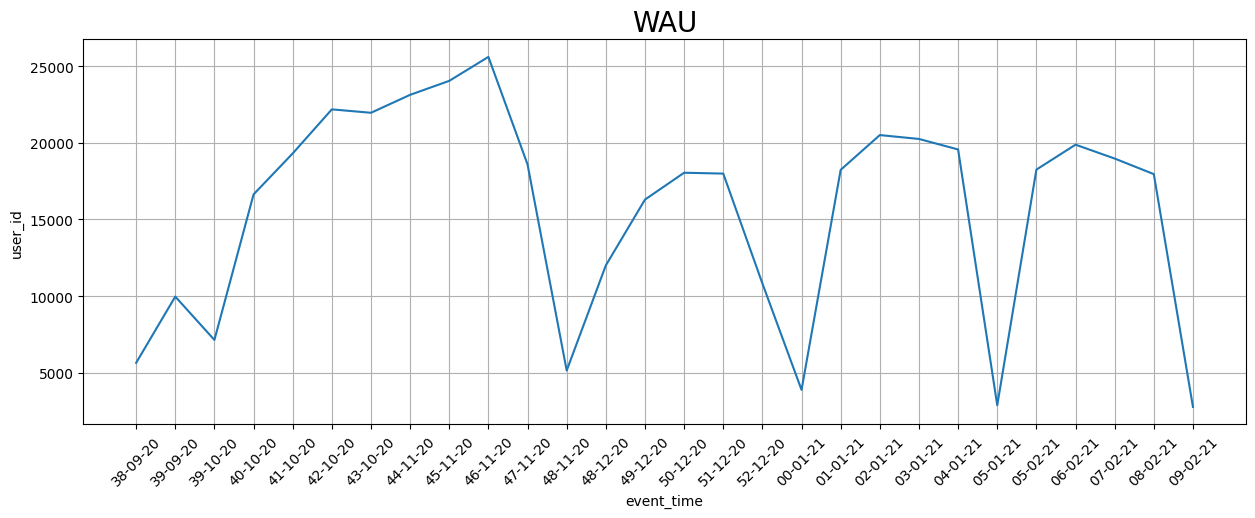

In [163]:
plt.figure(figsize=(15,5))
sns.lineplot(data=wau,x='event_time',y='user_id')
plt.xticks(rotation=45)
plt.grid()
plt.title('WAU',fontsize=20)
plt.show()

# Shopping Cart Abandonment

In [170]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [198]:
items_carted_month = df[df['event_type']=='cart'].groupby(['user_id',df['event_time'].dt.strftime('%m-%y')]).agg({'category_id':'nunique'}) \
    .reset_index().sort_values('category_id',ascending=False).rename({'category_id':'items_in_cart'},axis=1)

In [201]:
items_bought_month = df[df['event_type']=='purchase'].groupby(['user_id',df['event_time'].dt.strftime('%m-%y')]).agg({'category_id':'nunique'}) \
    .reset_index().sort_values('category_id',ascending=False).rename({'category_id':'items_bought'},axis=1)

In [205]:
sca_month = pd.merge(items_bought_month,items_carted_month,how='inner',on=['user_id','event_time'])

In [208]:
sca_month

,user_id,event_time,items_bought,items_in_cart
0,1515915625567754658,12-20,10,11
1,1515915625604293348,02-21,10,11
2,1515915625565385220,12-20,10,11
3,1515915625603113992,02-21,10,11
4,1515915625598216695,01-21,10,10
...,...,...,...,...
20444,1515915625539914586,11-20,1,1
20445,1515915625539913911,11-20,1,1
20446,1515915625539912172,11-20,1,1
20447,1515915625539910852,11-20,1,1


In [213]:
abandonment = sca_month[sca_month['items_bought']<sca_month['items_in_cart']]['event_time'].value_counts().reset_index()

In [218]:
event_amount = sca_month['event_time'].value_counts().reset_index()

In [222]:
sca = pd.merge(abandonment,event_amount,on='index') \
    .rename({'index':'event_time','event_time_x':'not_bought_amount','event_time_y':'bought_amount'},axis=1)

In [227]:
sca['sca_per'] = round(sca['not_bought_amount']/sca['bought_amount']*100,2)

In [228]:
sca['month'] = sca['event_time'].apply(lambda x:int(x[:2]))
sca['year'] = sca['event_time'].apply(lambda x:int(x[3:]))
sca = sca.sort_values(by=['year','month'])

In [229]:
sca

,event_time,not_bought_amount,bought_amount,sca_per,month,year
5,09-20,8,572,1.40,9,20
4,10-20,35,3545,0.99,10,20
2,11-20,54,4144,1.30,11,20
3,12-20,37,3673,1.01,12,20
0,01-21,78,4476,1.74,1,21
1,02-21,74,4039,1.83,2,21


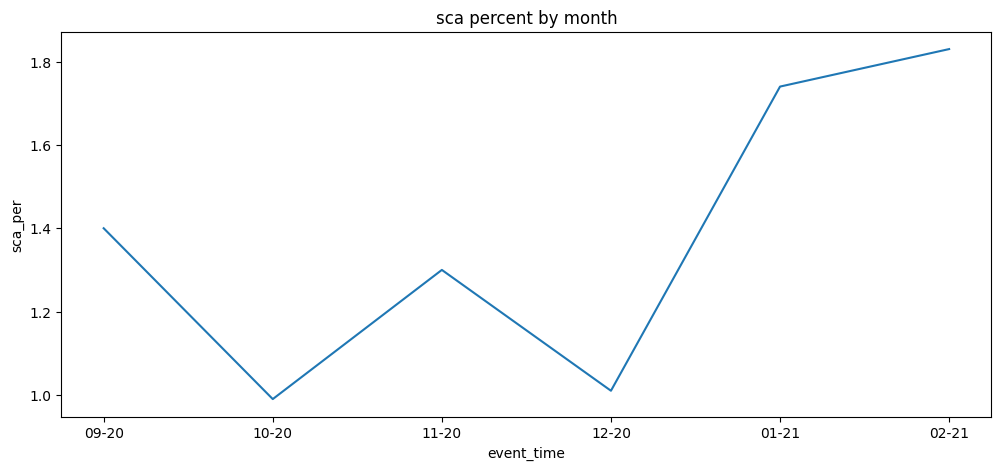

In [234]:
plt.figure(figsize=(12,5))
sns.lineplot(data=sca,x='event_time',y='sca_per')
plt.title('sca percent by month')
plt.show()

# average order value

In [274]:
total_aov = round(df[df['event_type']=='purchase']['price'].mean())
print('AOV :',total_aov,'$')

AOV : 137 $


In [275]:
aov_month = df[df['event_type']=='purchase'].groupby(df['event_time'].dt.strftime('%m-%y')) \
    .agg({'price':'mean'}).reset_index()

In [276]:
aov_month

,event_time,price
0,01-21,179.003075
1,02-21,180.140722
2,09-20,95.683227
3,10-20,89.641554
4,11-20,104.025118
5,12-20,124.535273


In [278]:
aov_month['month'] = aov_month['event_time'].apply(lambda x:int(x[:2]))
aov_month['year'] = aov_month['event_time'].apply(lambda x:int(x[3:]))
aov_month = aov_month.sort_values(by=['year','month'])

In [279]:
aov_month

,event_time,price,month,year
2,09-20,95.683227,9,20
3,10-20,89.641554,10,20
4,11-20,104.025118,11,20
5,12-20,124.535273,12,20
0,01-21,179.003075,1,21
1,02-21,180.140722,2,21


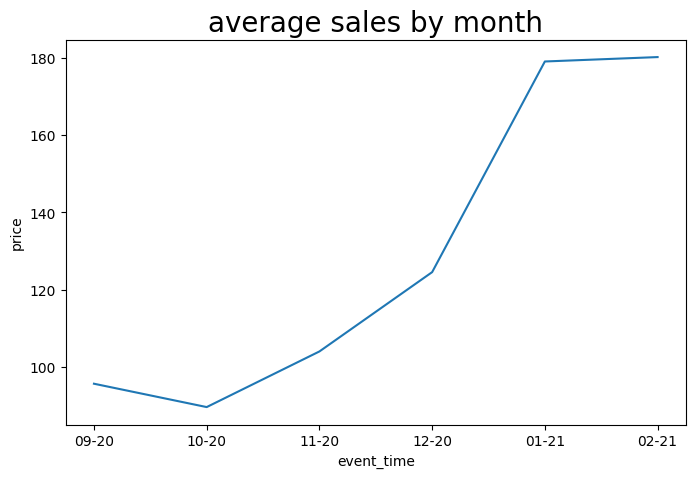

In [286]:
plt.figure(figsize=(8,5))
sns.lineplot(data = aov_month,x='event_time',y='price')
plt.title('average sales by month',fontsize=20)
plt.show()